## TechnoHacks EduTech Data Analytics Internship
### Task 1 - Data Cleaning
#### - By Azeen Hodekar                                             
##### Date - 1st September 2023

In [1]:
#Importing regular data analytics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data in the dataframe
df = pd.read_csv('train.csv')

In [3]:
#Gathering basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Head function to get overview of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### As you can see there are missing values in cabin column

In [5]:
#Tail function to get overview of data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### As you can see there are missing values in age column too

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Getting the shape of the data
df.shape

(891, 12)

In [8]:
#Checking how many null values are present
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Calculating percentage of missing values
df.isnull().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### The cabin column has more than 75% missing values.
#### In other cases, we would simply drop the column. But in cases where the cabin column is necessary for analysis, we could fill the null values with 'unknown'

In [10]:
df.Cabin = df.Cabin.fillna('unknown')

#### We could also fill missing values in age column with the mean age in the dataset

In [11]:
df.Age = df.Age.fillna(int(df.Age.mean()))

#### In the embarked column we can replace missing values with the most common value in the Embarked column

In [12]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

#### Let us now check the overview of the dataset once again.

In [13]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,unknown,C


In [14]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,unknown,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,unknown,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.0,0,0,349217,7.8958,unknown,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,unknown,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,unknown,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,unknown,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,unknown,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,unknown,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,unknown,Q


In [15]:
df.shape

(891, 12)

#### As you can see we removed all the missing values without dropping a single record

#### Let us now calculate missing values again

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### For removing outliers we must first identify them.

### The technique we'll be using to identify outliers will be visualization and IQR

<Axes: xlabel='Age'>

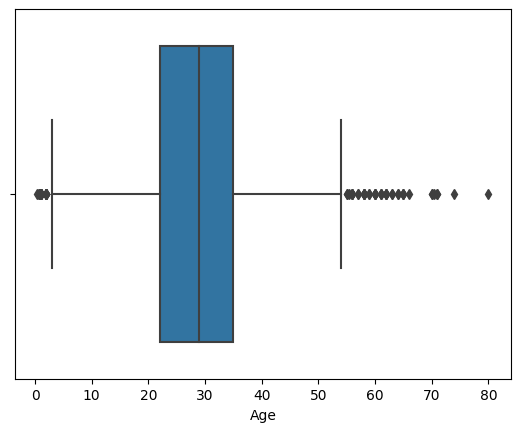

In [17]:
# Visualizing outliers in age column
sns.boxplot(x='Age', data=df) 

<Axes: xlabel='Fare'>

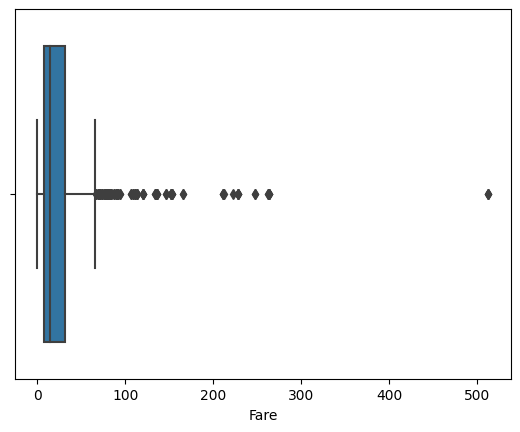

In [18]:
# Visualizing outliers in fare column
sns.boxplot(x='Fare', data=df) 

### For detecting the outliers we will use IQR method.

In [19]:
#For Fare column
Q1_fare = df.Fare.quantile(0.25)
Q3_fare = df.Fare.quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_limit_fare = Q1_fare - (1.5 * IQR_fare)
upper_limit_fare = Q3_fare + (1.5 * IQR_fare)

print(lower_limit_fare, upper_limit_fare)

-26.724 65.6344


Outliers in this case will be the values that are lower than the lower limit or higher than the upper limit.

In [20]:
outliers = df[(df.Fare < lower_limit_fare) | (df.Fare > upper_limit_fare)]
outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,unknown,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


We will create a new dataframe which doesn't have outliers

In [21]:
df2 = df[(df.Fare > lower_limit_fare) & (df.Fare < upper_limit_fare)]

In [22]:
df2.shape

(775, 12)

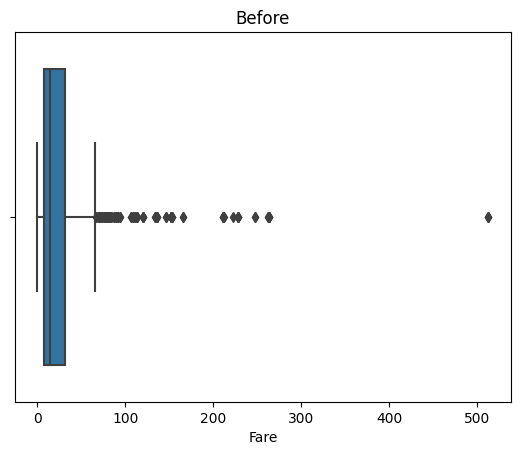

In [23]:
#Before removing outliers
sns.boxplot(x='Fare', data=df)
plt.title('Before')
plt.show()

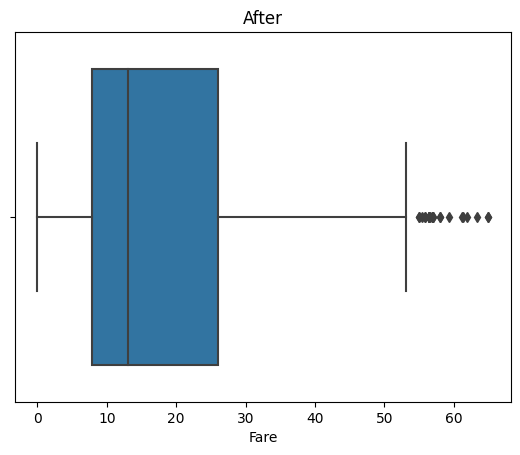

In [24]:
sns.boxplot(x='Fare', data=df2)
plt.title('After')
plt.show()

### Detecting outliers in age column

We can define outiers in age as the extreme values like below the 5th percetile or above the 95th percentile

In [25]:
max_age_value = df.Age.quantile(0.95)
min_age_value = df.Age.quantile(0.05) 

In [26]:
#Creating a new dataframe with no age outliers
df3 = df2[(df2.Age > min_age_value) & (df2.Age < max_age_value)]

In [27]:
df3.shape

(693, 12)

Text(0.5, 1.0, 'Before')

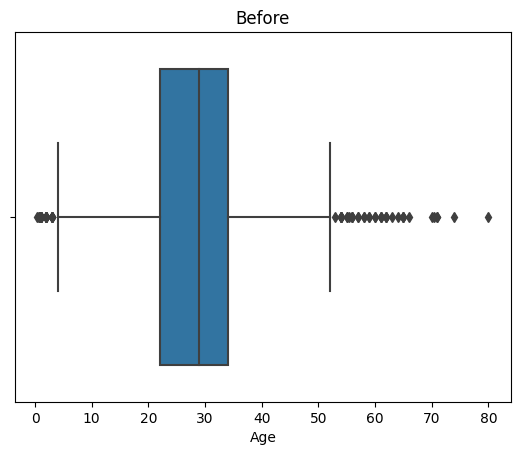

In [28]:
#Before removing age outliers
sns.boxplot(x='Age', data=df2)
plt.title('Before')

Text(0.5, 1.0, 'After')

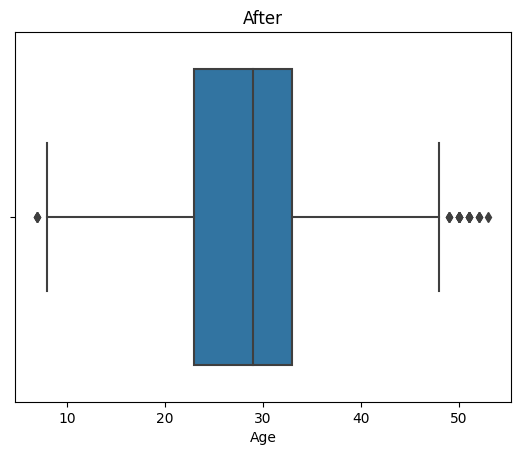

In [29]:
#After removing age outliers
sns.boxplot(x='Age', data=df3)
plt.title('After')

In [30]:
df3.to_csv('cleaned_data.csv', index=False)

### **Conclusion :** The data has been cleaned and is now free of missing values and outliers